In [14]:
from sklearn.datasets import make_circles, make_blobs
import seaborn as sns
import numpy as np
from umap import UMAP
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.lines import Line2D      

from sklearn.manifold import MDS
from q2_anomaly_detection.models import Cloud
import matplotlib.pyplot as plt
from skbio.stats.ordination import pcoa
from matplotlib.colors import Normalize
from scipy.spatial.distance import cdist
from friendly_guacamole.transforms import PCoA
%matplotlib inline

In [15]:
X, y = make_circles(1000, noise=True)
y = np.zeros(X.shape[0])
X = 20 * X

n_points = 20
X2, y2 = make_circles(n_points * 2, noise=False, shuffle=False)
y2 = y2 + 1

X2 = 300 * X2
X2, y2 = X2[:n_points], y2[:n_points]


In [16]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [17]:
rho, phi = cart2pol(X2[:, 0], X2[:, 1])

phi = phi / 6

In [18]:
phi

array([ 0.        ,  0.05235988,  0.10471976,  0.15707963,  0.20943951,
        0.26179939,  0.31415927,  0.36651914,  0.41887902,  0.4712389 ,
        0.52359878, -0.4712389 , -0.41887902, -0.36651914, -0.31415927,
       -0.26179939, -0.20943951, -0.15707963, -0.10471976, -0.05235988])

In [19]:
x1, x2 = pol2cart(rho, phi)
# X2 = np.vstack([x1, y2]).transpose()
X2 = np.vstack([x1, x2]).transpose()


X2[0] = [100, 200]
y2[0] += 1

In [20]:
X = np.vstack([X, X2])
y = np.hstack([y, y2])

In [26]:
X, y = make_blobs(1000,
                  centers=[[0, 0], [10, 0], [20, 0]],
                  random_state=901)
umap_fitter = UMAP(random_state=724)
pcoa_fitter = PCoA()

umap_fitter.fit(X)
pcoa_fitter.fit(cdist(X, X))

U = umap_fitter.embedding_

# PCs = pcoa(cdist(X, X))
# M = PCs.samples.iloc[:, :2].values
M = pcoa_fitter.embedding_



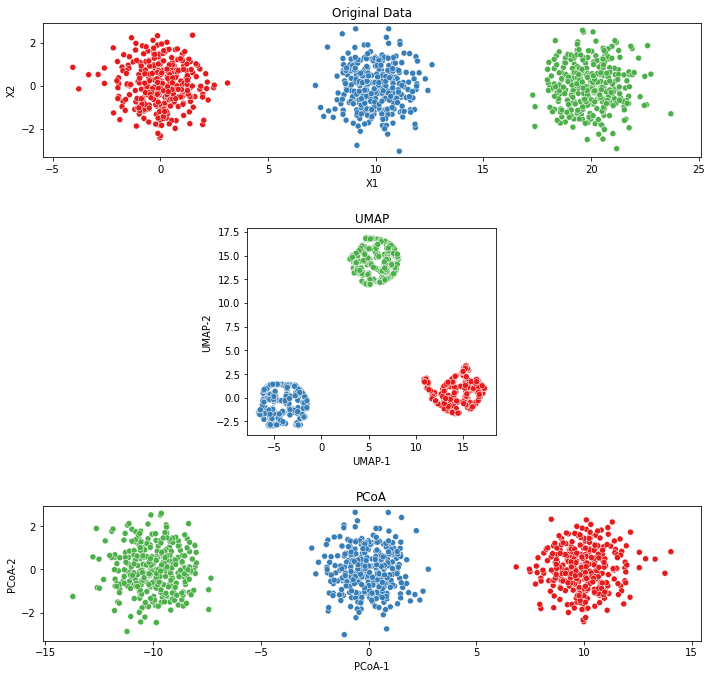

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
g = sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y,
    ax=axs[0],
    palette='Set1',
)
g.set_aspect('equal')
g.legend_.remove()
g.set_xlabel('X1')
g.set_ylabel('X2')
g.set_title('Original Data')

g = sns.scatterplot(
    x=U[:, 0],
    y=U[:, 1],
    hue=y,
    ax=axs[1],
    palette='Set1',
)
g.set_xlabel('UMAP-1')
g.set_ylabel('UMAP-2')
g.legend_.remove()
g.set_aspect('equal')
g.set_title('UMAP')


g = sns.scatterplot(
    x=M[:, 0],
    y=M[:, 1],
    hue=y,
    ax=axs[2],
    palette='Set1',
#     palette='RdBu',
)
g.set_xlabel('PCoA-1')
g.set_ylabel('PCoA-2')
g.legend_.remove()
g.set_aspect('equal')
g.set_title('PCoA')
plt.tight_layout()
plt.savefig('results/blobs-distances-example.png')

In [34]:
random_state = 170
n_samples=1000

X, y = make_blobs(n_samples=n_samples, random_state=random_state,
#                   centers=[[0, 0], [20, 0]],
                  centers=2,
                  shuffle=True,
                 )
transformation = [[0.6, -0.6], [-0.4, 0.8]]

X_aniso = np.dot(X, transformation)


umap_fitter = UMAP(random_state=random_state, n_components=1)

umap_fitter.fit(X_aniso)

U = umap_fitter.embedding_

PCs = pcoa(cdist(X_aniso, X_aniso))
M = PCs.samples.iloc[:, :2].values

ValueError: Data must be 1-dimensional

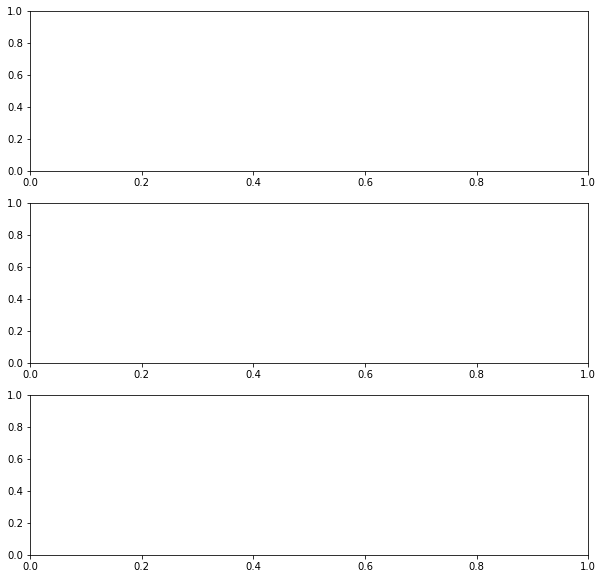

In [33]:
len_trajectory = 20
vertical_vals = np.random.uniform(size=len(X_aniso))
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
g = sns.scatterplot(
    x=X_aniso[:, 0],
    y=X_aniso[:, 1],
    hue=y,
    ax=axs[0],
    palette='Set1',
)
# line = Line2D(X_aniso[:len_trajectory, 0], X_aniso[:len_trajectory, 1])
# axs[0].add_line(line)
g.set_aspect('equal')
g.legend_.remove()
g.set_xlabel('X1')
g.set_ylabel('X2')
g.set_title('Original Data')

g = sns.scatterplot(
    x=U[:, 0],
    y=vertical_vals,
    hue=y,
    ax=axs[1],
    palette='Set1',
)
g.set_xlabel('UMAP-1')
g.set_ylabel('Random Noise')
g.legend_.remove()
g.set_title('UMAP')


g = sns.scatterplot(
    x=M[:, 0],
    y=M[:, 1],
    hue=y,
    ax=axs[2],
    palette='Set1',
)
g.set_xlabel('PCoA-1')
g.set_ylabel('Random Noise')
g.legend_.remove()
g.set_title('PCoA')
plt.tight_layout()
plt.savefig('results/random-trajectory.png')

In [61]:


random_state = 425
n_samples=1000

X, y = make_blobs(n_samples=n_samples, random_state=random_state,
                  centers=[[0, 0]],
                  shuffle=True,
                 )
transformation = [[0.6, -0.6], [-0.4, 0.8]]

X_aniso = np.dot(X, transformation)

X, y_new = make_blobs(n_samples=n_samples, random_state=random_state,
                    centers=[[0, 0]],
                    # cluster_std=0.1,
                      shuffle=True,
                      )

X[:, 0] *= 0.5
X[:, 0] += 3.0
X[:, 1] *= 0.1
X[:, 1] += 0.5

X_aniso = np.vstack([X_aniso, X])
y = np.vstack([y, y_new + 1]).flatten()


umap_fitter = UMAP(random_state=random_state, n_components=1)

umap_fitter.fit(X_aniso)

U = umap_fitter.embedding_

PCs = pcoa(cdist(X_aniso, X_aniso))
M = PCs.samples.iloc[:, :2].values

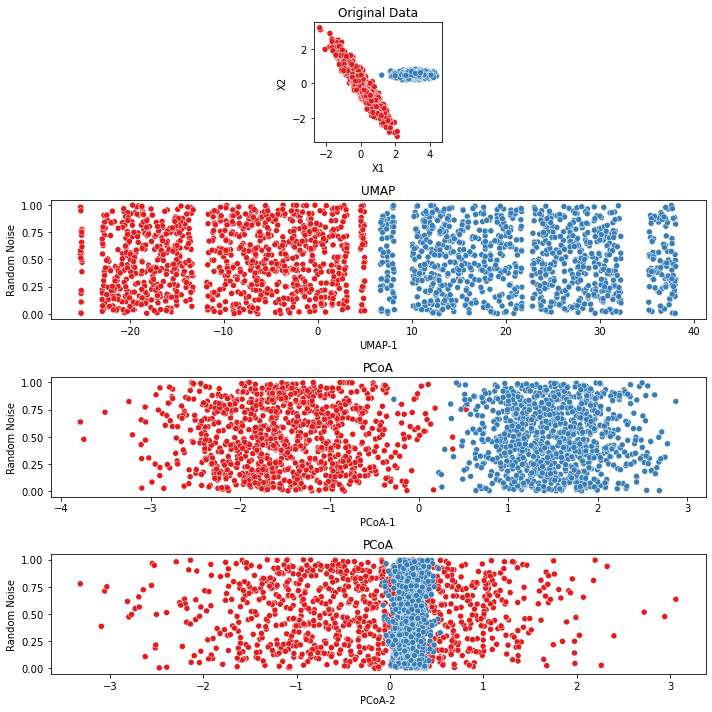

In [62]:
len_trajectory = 20
vertical_vals = np.random.uniform(size=len(X_aniso))
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
g = sns.scatterplot(
    x=X_aniso[:, 0],
    y=X_aniso[:, 1],
    hue=y,
    ax=axs[0],
    palette='Set1',
)
# line = Line2D(X_aniso[:len_trajectory, 0], X_aniso[:len_trajectory, 1])
# axs[0].add_line(line)
g.set_aspect('equal')
g.legend_.remove()
g.set_xlabel('X1')
g.set_ylabel('X2')
g.set_title('Original Data')

g = sns.scatterplot(
    x=U[:, 0],
#     y=U[:, 1],
    y=vertical_vals,
    hue=y,
    ax=axs[1],
    palette='Set1',
)
# line = Line2D(U[:len_trajectory, 0], vertical_vals[:len_trajectory])
# axs[1].add_line(line)
g.set_xlabel('UMAP-1')
g.set_ylabel('Random Noise')
g.legend_.remove()
# g.set_aspect('equal')
g.set_title('UMAP')


g = sns.scatterplot(
    x=M[:, 0],
#     y=M[:, 1],
    y=vertical_vals,
    hue=y,
    ax=axs[2],
    palette='Set1',
#     palette='RdBu',
)
# line = Line2D(M[:len_trajectory, 0], vertical_vals[:len_trajectory])
# axs[2].add_line(line)
g.set_xlabel('PCoA-1')
g.set_ylabel('Random Noise')
g.legend_.remove()
# g.set_aspect('equal')
g.set_title('PCoA')

g = sns.scatterplot(
    x=M[:, 1],
    y=vertical_vals,
    hue=y,
    ax=axs[3],
    palette='Set1',
)
g.set_xlabel('PCoA-2')
g.set_ylabel('Random Noise')
g.legend_.remove()
g.set_title('PCoA')
plt.tight_layout()

plt.savefig('results/clusters-not-visible.png')